[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/CMU-IDeeL/CMU-IDeeL.github.io/blob/master/F25/document/Recitation_0_Series/0.11/0_11_Datasets_Part_2.ipynb)

In [ ]:
# Libraries that will be used in this recitation
import numpy as np
import torch
import pandas as pd

In this recitation, you will learn about one if the audio datasets that will be used in our class.

# Audio Datasets (Homework 1)

In homework 1, we will provide you with MFCC speech data formatted in numpy arrays. MFCC is derived from raw waveform data. The process of calculating MFCC is not required in this course, but we will cover that in Recitation 1.

The datasets for HW1P2 is organized below.

```
some-competition-datasets
  ├── dev-clean: For evaluation of your model, transcripts(lables) are provided
  ├── test-clean: You have to predict the samples in this folder, and submit the result of your prediction to Kaggle
  └── train-clean-100: For training
```




## Import the Test Data

## Unzipping the Dataset

In [ ]:
!unzip -qo /content/Recitation_0.14_data.zip -d '/content'

## Training Samples & Labels

After unzipping, Load one sample and corresponding label from ```Recitation_0.14_data```.

In [ ]:
SAMPLE_INDEX = "1272-128104-0009"
x_file_path = f"/content/Recitation_0.14_data/mfcc/{SAMPLE_INDEX}.npy"
y_file_path = f"/content/Recitation_0.14_data/transcript/{SAMPLE_INDEX}.npy"


x = np.load(x_file_path)
y = np.load(y_file_path)

Now we have loaded one speech data and its transcript. Every speech MFCC data is organized as an array of shape ```T x 28```, where ```T``` is the total number of timesteps, and 28 is the number of features for MFCC file format.

In [ ]:
print("Shape of x: ", x.shape)

Shape of x:  (1825, 28)


As for the transcript, it is organized as a 1-D array with length ```T + 2``` The two extra timesteps are \<SOS\> and \<EOS\> tokens, which stand for "start of sequence" and "end of sequence", located in the beggining and the end respectively.

**NOTE:** For homework 1, the two tokens are not needed. So you might want to remove them in part of your preprocessing pipeline.

In [ ]:
print("Shape of y: ", y.shape)
print("Some elements of y: ", y[77:87])

Shape of y:  (1827,)
Some elements of y:  ['L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L']


## Context Information

Proper management of local context is essential to homework 1, in which we are predicting the phoenome for each of the time step. The dominant solution in the past was setting a "hand-crafted" context with the following approaches: derivatives or context windows. In this homework, we are going to apply context windows.

Context windows adds a local context by simply concatenating multiple consecutive timesteps. The result is a bigger feature vector that is better "aware" of the local information.

For example, originally, the input to the network and the expected output to the network for timestep 64 would be:

In [ ]:
x[64], y[65] # y is offset by one as we would like to ignore the SOS token

(array([-2.71944275e+01,  2.75271626e+01,  2.64715347e+01, -7.94004107e+00,
        -4.98173094e+00, -3.83015394e+00,  1.95904713e+01, -7.39578152e+00,
         6.96945667e+00,  1.58027525e+01,  3.30792546e+00, -2.05057216e+00,
        -6.88332558e+00, -3.39014101e+00,  1.03521204e+00,  5.14063978e+00,
        -3.66227412e+00,  5.28887033e+00,  3.91332150e+00,  2.56487012e+00,
         1.00877535e+00, -7.50973284e-01,  2.04022810e-01, -1.72643125e-01,
        -3.23839128e-01, -1.29539478e+00, -9.14911856e-04,  1.17291916e+02],
       dtype=float32),
 'HH')

In [ ]:
x[64].shape

(28,)

Now we want to apply context window of 10 to the 64-th timestep, this could be done by concatenating features from 10 past and 10 future frames.:

In [ ]:
x_with_context = x[64 - 10: 64 + 11] # Use slicing to get

In [ ]:
print("After concatinating context, the shape of x:", x_with_context.shape)

After concatinating context, the shape of x: (21, 28)


Since we are designing an MLP network, we might want to flatten x to a 1-D array as its a single training sample.

In [ ]:
x_with_context_flattened = x_with_context.reshape(-1)

In [ ]:
print("After flattening, the shape of x:", x_with_context_flattened.shape)

After flattening, the shape of x: (588,)


Visualizing the data is important! It can help you understand the underlying distribution, identify patterns, trends and anomalies and even help guide you towards selecting an appropriate model for the task. Below is an example on how one might go about plotting MFCC's with Matplotlib. NOTE: The sample has been flipped and transposed so that the visualization is consistent with how MFCC;s are typically visualized.Here, The x-axis represents timesteps and the y-axis represents the MFCC's.

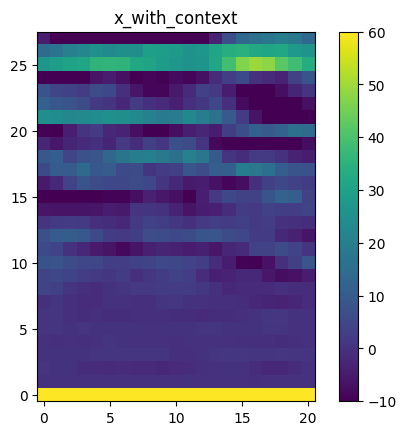

In [ ]:
import matplotlib.pyplot as plt
import matplotlib


fig, ax = plt.subplots()
im = ax.imshow(np.flip(x_with_context, axis=1).T, interpolation='nearest', vmin=-10.0, vmax=60.0, cmap=matplotlib.cm.viridis, origin='lower')
ax.set_title('x_with_context')
fig.colorbar(im)
plt.show()